In [1]:
import os
import pickle

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

---
## Evaluate Model History

In [4]:
# Open serialized training history data for VGG-16 model.
with open(r'model-info/mobilenet-training', 'rb') as input_file:
            history = pickle.load(input_file, encoding='bytes')

In [12]:
validation_score = history['val_acc'][-1] # get the last entry
validation_score = round(validation_score * 100, 2)
print('Validation accuracy (latest): {}%'.format(validation_score))

training_score = history['acc'][-1] # get the last entry
training_score = round(training_score * 100, 2)
print('Training accuracy (latest): {}%'.format(training_score))

Validation accuracy (latest): 99.03%
Training accuracy (latest): 99.48%


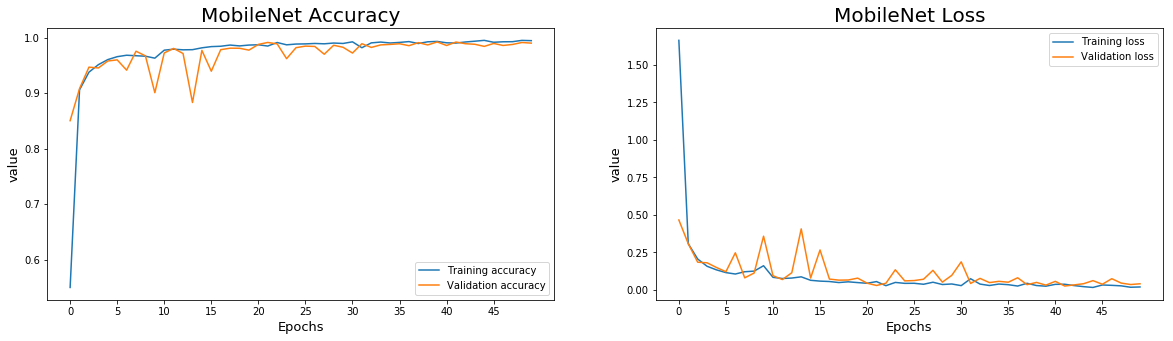

In [8]:
# Plot the training history.
title_font = 20
axis_font = 13

figure, axes = pyplot.subplots(1, 2, figsize=(20, 5))

axes[0].set_xticks(range(0, 50, 5))
axes[0].plot(history['acc'], label='Training accuracy')
axes[0].plot(history['val_acc'], label='Validation accuracy')
axes[0].set_title('MobileNet Accuracy', fontsize=20)
axes[0].set_xlabel('Epochs', fontsize=axis_font)
axes[0].set_ylabel('value', fontsize=axis_font)
axes[0].legend() 

axes[1].set_xticks(range(0, 50, 5))
axes[1].plot(history['loss'], label='Training loss')
axes[1].plot(history['val_loss'], label='Validation loss')
axes[1].set_title('MobileNet Loss', fontsize=20)
axes[1].set_xlabel('Epochs', fontsize=axis_font)
axes[1].set_ylabel('value', fontsize=axis_font)
axes[1].legend()

---
## Evaluate Model Performance

In [9]:
model = models.load_model('model-info/mobilenet')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 3,321,034
Trainable params: 3,299,146
Non-trainable params: 21,888
__